In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['DFKai-sb']
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
# 資料載入
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv')
s = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 }
df['Species']=df['Species'].map(s)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [2]:
# 欄位設定
X_col_num = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X_col_cat = []
X_cols = X_col_num + X_col_cat
y_col = 'Species'
# 資料切割成訓練和測試集
from sklearn.model_selection import train_test_split
X = df[X_cols]
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [3]:
print(df.groupby('Species'))

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [5]:
num_pl = make_pipeline(
    SimpleImputer(strategy='median')
)

In [6]:
cat_pl = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse=False)
)

In [7]:
data_pl = ColumnTransformer([
    ('num_pl', num_pl, X_col_num),
    ('cat_pl', cat_pl, X_col_cat)
])

In [8]:
data_pl.fit_transform(X_train)[:1]

array([[5.7, 2.9, 4.2, 1.3]])

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
model_pl_tree = make_pipeline(
    data_pl,DecisionTreeClassifier(random_state=42)
)
model_pl_tree.fit(X_train, y_train)
y_pred = model_pl_tree.predict(X_train)
print('正確率：', accuracy_score(y_train, y_pred).round(2))
print('混亂矩陣')
print(confusion_matrix(y_train, y_pred))

正確率： 1.0
混亂矩陣
[[31  0  0]
 [ 0 35  0]
 [ 0  0 34]]


In [10]:
y_pred = model_pl_tree.predict(X_test)
print('正確率：', accuracy_score(y_test, y_pred).round(2))
print('混亂矩陣')
print(confusion_matrix(y_test, y_pred))

正確率： 0.98
混亂矩陣
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


In [11]:
model_pl_tree = make_pipeline(
    data_pl,
    DecisionTreeClassifier(max_depth=4, random_state=42)
)
model_pl_tree.fit(X_train, y_train)
print('「訓練集」的正確率：', model_pl_tree.score(X_train, y_train).round(2))
print('「測試集」的正確率：', model_pl_tree.score(X_test, y_test).round(2))

「訓練集」的正確率： 0.98
「測試集」的正確率： 0.98


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


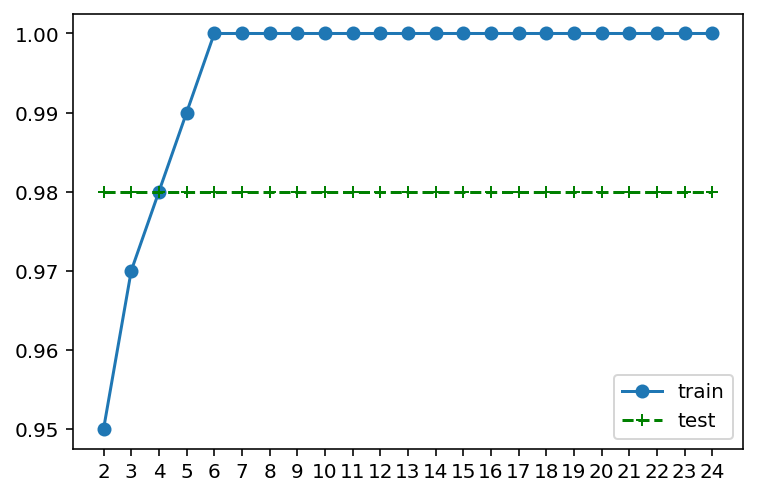

In [12]:
acc_train = []
acc_test = []
n_depth = range(2,25)
for n in n_depth:
    model_pl_tree = make_pipeline(
        data_pl,
        DecisionTreeClassifier(max_depth=n, random_state=42)
    )
    model_pl_tree.fit(X_train, y_train)
    acc_train.append(model_pl_tree.score(X_train, y_train))
    acc_test.append(model_pl_tree.score(X_test, y_test))
# 繪圖開始
plt.plot(n_depth, acc_train,marker='o', label='train')
plt.plot(n_depth, acc_test,c='green',marker='+', ls='--', label='test')
plt.xticks(n_depth, n_depth)
plt.legend();

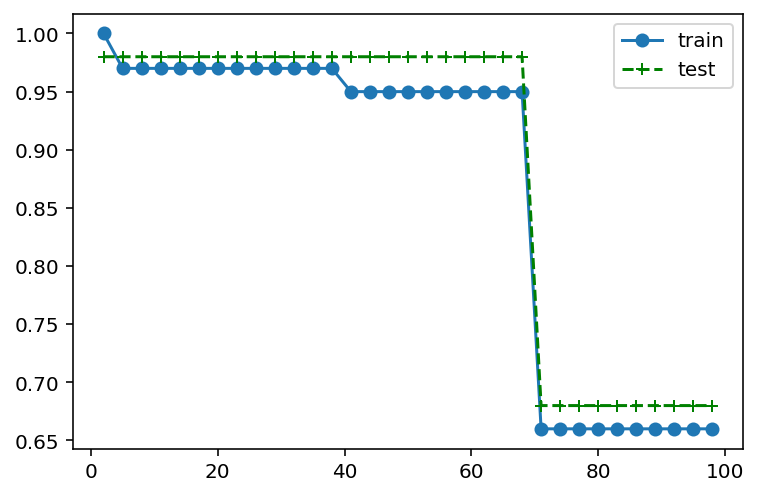

In [20]:
acc_train = []
acc_test = []
n_range = range(2,100,3)
for n in n_range:
    model_pl_tree = make_pipeline(
        data_pl,
        DecisionTreeClassifier(random_state=42, min_samples_split=n)
    )
    model_pl_tree.fit(X_train, y_train)
    acc_train.append(model_pl_tree.score(X_train, y_train).round(2))
    acc_test.append(model_pl_tree.score(X_test, y_test).round(2))
plt.plot(n_range, acc_train, marker='o', label='train')
plt.plot(n_range, acc_test, c='green', marker='+', ls='--', label='test')
plt.legend();

In [19]:
from sklearn.model_selection import cross_val_score
s = cross_val_score(model_pl_tree, X, y, scoring='accuracy', cv=10)
print('交叉驗證每次的準確率：',s)
print('交叉驗證得到的平均準確率：',s.mean())

交叉驗證每次的準確率： [1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]
交叉驗證得到的平均準確率： 0.96


In [14]:
model_pl_tree = make_pipeline(
    data_pl,
    DecisionTreeClassifier(max_depth=4, random_state=42)
)
model_pl_tree.fit(X_train, y_train)
tree = model_pl_tree.named_steps['decisiontreeclassifier']
feature_importance = tree.feature_importances_.round(3)
feature_importance

array([0.013, 0.021, 0.567, 0.399])

In [15]:
print(f'數值型特徵值{X_col_num}')
#print(f'類別型特徵值{X_col_cat}')
cat_pl = data_pl.named_transformers_['cat_pl']
#oh_cols = cat_pl.named_steps['onehotencoder'].\
#get_feature_names(X_col_cat)
#print(f'獨熱編碼後的特徵值。{oh_cols}')
cols = X_col_num #+ oh_cols.tolist()
print(f'所有欄位{cols}')

數值型特徵值['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
所有欄位['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [16]:
pd.DataFrame(feature_importance, index=cols, columns=['係數']).\
sort_values(by='係數', ascending=False)

,係數
PetalLengthCm,0.567
PetalWidthCm,0.399
SepalWidthCm,0.021
SepalLengthCm,0.013


In [17]:
# from sklearn.tree import export_graphviz
# import pydot
# from IPython.display import Image
# # features 變數存放所有欄位名稱
# features = cols
# # class_names 變數存放目標值表呈現的文字意義
# class_names = ['死', '活']
# # export_graphviz 的第一個參數是決策樹模型的預測結果
# # max_depth=3 可設定決策樹呈現的深度，其餘參數讀者可自己測試
# dot_data = export_graphviz(
#     model_pl_tree.named_steps['decisiontreeclassifier'],
#     out_file=None,
#     feature_names=features,
#     class_names = class_names,
#     proportion = False,
#     max_depth=3,
#     filled=True,
#     rounded=True
# )
# graph = pydot.graph_from_dot_data(dot_data)
# # 也將結果存到 tree.png 檔案裡
# graph[0].write_png('tree.png')
# Image(graph[0].create_png())